In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [35]:
def sort_vertices(pts):
    xpts = pts[:, 0]
    ypts = pts[:, 1]
    xc = np.sum(xpts) / len(xpts)
    yc = np.sum(ypts) / len(ypts)
    theta = np.arctan2(ypts - yc, xpts - xc) * 180 / np.pi
    indices = np.argsort(theta)
    return pts[indices]

def compute_intx_pt(a, b):
    pt1, pt2 = a
    pt3, pt4 = b
    den = np.cross(pt1 - pt2, pt3 - pt4)
    nums = np.cross(pt1, pt2) * (pt3 - pt4) - np.cross(pt3, pt4) * (pt1 - pt2)
    return nums / den

def clipPoly(start, dims, poly):
    plt.figure(figsize=(5, 5))
    sorted_poly = sort_vertices(poly)
    plt.scatter(poly[:, 0], poly[:, 1])
    plt.fill(sorted_poly[:, 0], sorted_poly[:, 1], fc="blue", alpha=0.5)
    plt.gca().add_patch(plt.Rectangle(start, dims[0], dims[1], fc="none", ec="black"))
    plt.xlim(0, 100)
    plt.ylim(0, 100)
    
    w_pts = np.array([start, start + [0, dims[1]], start + dims, start + [dims[0], 0]])
    for i in range(len(w_pts)):
        poly_pts = []
        pt1 = w_pts[i]
        pt2 = w_pts[(i + 1) % len(w_pts)]
        p = np.apply_along_axis(lambda x: np.cross(pt2 - pt1, x - pt1), 1, sorted_poly)
        for j in range(len(p)):
            
            cur, nextt = j, (j + 1) % len(p) 
            if p[cur] < 0 and p[nextt] < 0:
                poly_pts.append(sorted_poly[nextt])
            elif p[cur] < 0:
                intx_pt = compute_intx_pt((sorted_poly[cur], sorted_poly[nextt]), (pt1, pt2))
                poly_pts.append(intx_pt)
            elif p[nextt] < 0:
                intx_pt = compute_intx_pt((sorted_poly[cur], sorted_poly[nextt]), (pt1, pt2))
                poly_pts.append(intx_pt)
                poly_pts.append(sorted_poly[nextt])
        if not poly_pts:
            sorted_poly = []
            break
        sorted_poly = sort_vertices(np.array(poly_pts))
    if len(sorted_poly):
        print("Vertices of the visible portion of the polygon")
        plt.scatter(sorted_poly[:, 0], sorted_poly[:, 1], color="k")
        sorted_poly = np.round(sorted_poly, 2)
        print("\n".join(list(map(str, list(zip(sorted_poly[:, 0], sorted_poly[:, 1]))))))
    else:
        print("Polygon not visible")
    plt.show()

Polygon vertices
(33, 10)
(33, 85)
(84, 24)


Clipping Window
Start point: (28, 30)
Dimensions: (14, 13)
Vertices of the visible portion of the polygon
(33.0, 30.0)
(42.0, 30.0)
(42.0, 43.0)
(33.0, 43.0)


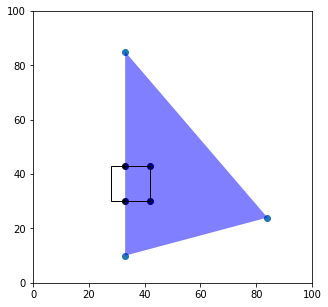

In [45]:
polysize = np.random.randint(3, 10)
pts = np.random.randint(1, 100, (polysize, 2))
start = np.random.randint(1, 50, (2,))
dims = np.random.randint(1, 50, (2,))
print("Polygon vertices")
print("\n".join(list(map(str, list(zip(pts[:, 0], pts[:, 1]))))))
print("\n\nClipping Window")
print("Start point:", tuple(start))
print("Dimensions:", tuple(dims))
clipPoly(start, dims, pts)